In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
import peaks_utility as psu
from multihist import Hist1d, Histdd
import time

Start import
Working on midway2-0416.rcc.local with the following versions 
and installation paths:
strax
	v0.12.4	/dali/lgrandi/strax/strax/strax
straxen
	v0.12.3	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [ ]:
import os
os.system('which python')

In [12]:
#1st test 28/10/2020
runs = ('009679','009681','009683','009685','009687','009689','009691','009693','009695',
        '009699','009701','009703','009705')
anode  = (0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0)
gate   = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.5,-1.0,-1.5,-2.0)
cathode= (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

#2nd test 29/10/2020
runs2 = ('009729','009731','009733','009735','009737','009739','009741','009746','009748')
anode2   = (4.0,   4.5,   5.0,   5.0,   5.0,   3.0,   3.0,   3.0,   3.0)
gate2    = (0.0,   0.0,   0.0,  -0.5,  -1.0,  -1.0,  -1.0,  -1.0,  -1.0)
cathode2 = (0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,  -8.5,  -13.0)

In [4]:
def plot_area_width(st, run_id = '009510'):
    if (st.is_stored(run_id, "peak_basics")):
        #peaks = st.get_array(run_id, targets = ('peak_basics'), #seconds_range = (0, 10),
                             #progress_bar=False)
        #print(f'Loaded {peaks.nbytes/1e6:.1f} MB of peaks-data')
        data = psu.select_data(st,run_id)
        psu.plot_area_width(data,0,4.5,1,4)
        
    else: print('peak_basics is not stored')

In [5]:
from multihist import Hist1d, Histdd
def plot_area_runs(runs,anodev,gatev,cathodev,log,lowl, highl):
    plt.figure(figsize=(12,6))
    for i, run in enumerate(runs):
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        livetime = (peaks['time'][len(peaks)-1]-peaks['time'][0])/1e9
        npmt = np.max(peaks['n_channels'])
        print('Run',run,'livetime:',livetime,'s','anode at',anodev[i],'kV','gate at',
              gatev[i],'cathode at',cathodev[i],'n. PMT',npmt)
        if (log): p_area = Hist1d(peaks['area'], bins=(np.logspace(lowl, highl, 500)))
        else: p_area = Hist1d(peaks['area'], bins=(np.linspace(lowl, highl, 500)))
        p_area /= (livetime)
        p_area.plot(label=f'{run} anode: {anodev[i]} kV, gate: {gatev[i]} kV, cathode: {cathodev[i]} kV')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("events/s", ha='right', y=1)
    if (log): plt.xscale('log')
    plt.legend()

Run 009679 livetime: 361.64852654 s anode at 0.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009681 livetime: 361.54358922 s anode at 0.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009683 livetime: 361.59459773 s anode at 1.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009685 livetime: 361.58649528 s anode at 1.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009687 livetime: 361.56094394 s anode at 2.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009689 livetime: 361.68532577 s anode at 2.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009691 livetime: 361.65152796 s anode at 3.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009693 livetime: 361.66590213 s anode at 3.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009695 livetime: 361.62790027 s anode at 4.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009699 livetime: 361.61942961 s anode at 4.0 kV gate at -0.5 cathode at 0.0 n. PMT 5
Run 009701 livetime: 361.7222501 s anode at 4.0 kV gate at -1.0 cathode at 0.0 n. PMT 5
Run 009703 livetime: 361.761478

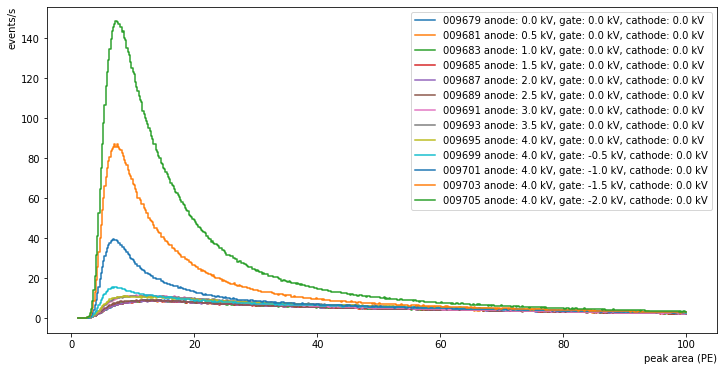

In [6]:
plot_area_runs(runs,anode,gate,cathode,0,1,100)

Run 009679 livetime: 361.64852654 s anode at 0.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009681 livetime: 361.54358922 s anode at 0.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009683 livetime: 361.59459773 s anode at 1.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009685 livetime: 361.58649528 s anode at 1.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009687 livetime: 361.56094394 s anode at 2.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009689 livetime: 361.68532577 s anode at 2.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009691 livetime: 361.65152796 s anode at 3.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009693 livetime: 361.66590213 s anode at 3.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009695 livetime: 361.62790027 s anode at 4.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009699 livetime: 361.61942961 s anode at 4.0 kV gate at -0.5 cathode at 0.0 n. PMT 5
Run 009701 livetime: 361.7222501 s anode at 4.0 kV gate at -1.0 cathode at 0.0 n. PMT 5
Run 009703 livetime: 361.761478

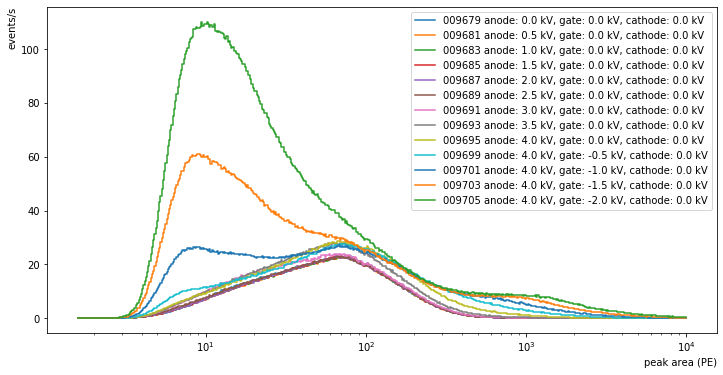

In [7]:
plot_area_runs(runs,anode,gate,cathode,1,0.2,4)

Run 009729 livetime: 361.69161467 s anode at 4.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009731 livetime: 361.7240206 s anode at 4.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009733 livetime: 361.65343651 s anode at 5.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009735 livetime: 361.76699125 s anode at 5.0 kV gate at -0.5 cathode at 0.0 n. PMT 5
Run 009737 livetime: 361.82679786 s anode at 5.0 kV gate at -1.0 cathode at 0.0 n. PMT 5
Run 009739 livetime: 878.73941746 s anode at 3.0 kV gate at -1.0 cathode at 0.0 n. PMT 6
Run 009741 livetime: 361.78537264 s anode at 3.0 kV gate at -1.0 cathode at 0.0 n. PMT 8
Run 009746 livetime: 361.83022996 s anode at 3.0 kV gate at -1.0 cathode at -8.5 n. PMT 8
Run 009748 livetime: 361.97182146 s anode at 3.0 kV gate at -1.0 cathode at -13.0 n. PMT 8


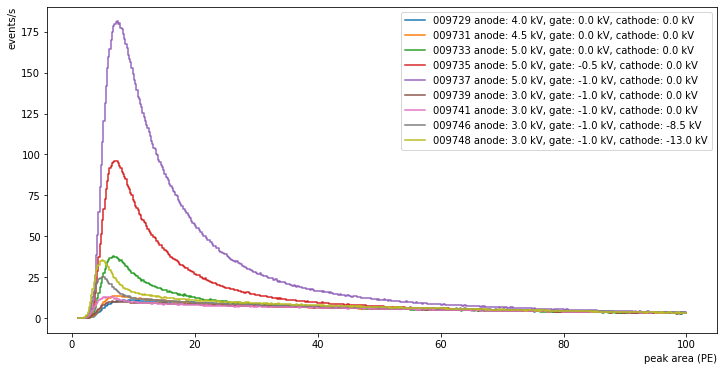

In [8]:
plot_area_runs(runs2,anode2,gate2,cathode2,0,1,100)

Run 009729 livetime: 361.69161467 s anode at 4.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009731 livetime: 361.7240206 s anode at 4.5 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009733 livetime: 361.65343651 s anode at 5.0 kV gate at 0.0 cathode at 0.0 n. PMT 5
Run 009735 livetime: 361.76699125 s anode at 5.0 kV gate at -0.5 cathode at 0.0 n. PMT 5
Run 009737 livetime: 361.82679786 s anode at 5.0 kV gate at -1.0 cathode at 0.0 n. PMT 5
Run 009739 livetime: 878.73941746 s anode at 3.0 kV gate at -1.0 cathode at 0.0 n. PMT 6
Run 009741 livetime: 361.78537264 s anode at 3.0 kV gate at -1.0 cathode at 0.0 n. PMT 8
Run 009746 livetime: 361.83022996 s anode at 3.0 kV gate at -1.0 cathode at -8.5 n. PMT 8
Run 009748 livetime: 361.97182146 s anode at 3.0 kV gate at -1.0 cathode at -13.0 n. PMT 8


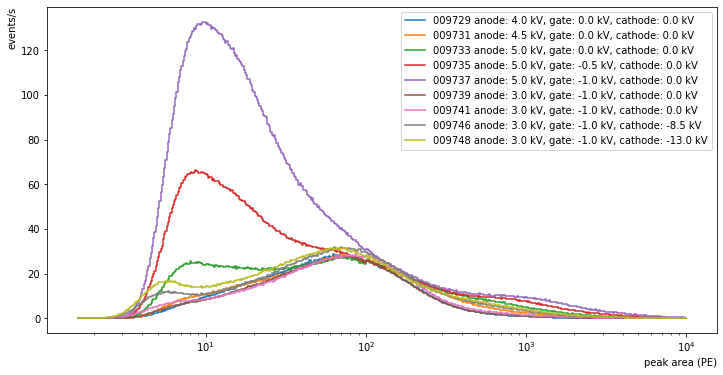

In [9]:
plot_area_runs(runs2,anode2,gate2,cathode2,1,0.2,4)

In [11]:
import os
import glob
from PIL import Image
area_cut1 = (20,1000)
width_cut1 = (50,200)
area_cut2 = (70,20000)
width_cut2 = (300,2000)
area_cut3 = (3,30)
width_cut3 = (250,2000)
def plot_area_vs_width(runs,anodev,gatev,cathodev):
    for i, run in enumerate(runs):
        plt.figure(i+1,figsize=(12,6))
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        psu.plot_area_width(peaks,0,4.5,1,4.5)
        #psu.rectangle(area_cut1,width_cut1,'b')
        #psu.rectangle(area_cut2,width_cut2,'r')
        #psu.rectangle(area_cut3,width_cut3,'y')
        #psu.rectangle(area_cut4,width_cut4,'g')
        plt.title(f'{run} anode: {anodev[i]} kV, gate: {gatev[i]} kV, cathode: {cathodev[i]} kV')
        plt.savefig(f'area_vs_width_run{run}.png')
    fp_in = f'area_vs_width_run*.png'
    fp_out = f'area_vs_width_run{runs[0]}-{runs[-1]}.gif'
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=500, loop=0)
    for i, run in enumerate(runs):
        os.remove(f'area_vs_width_run{run}.png')

<Figure size 864x432 with 0 Axes>

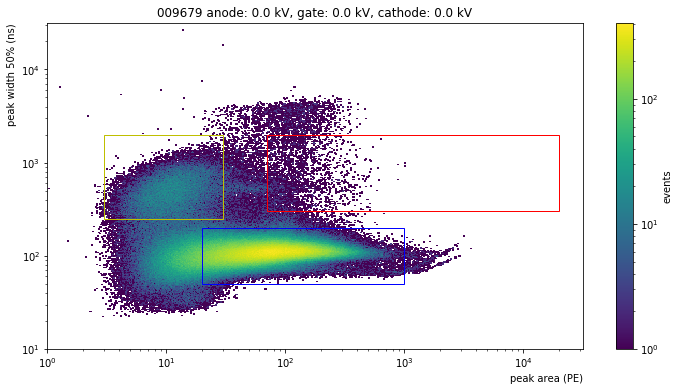

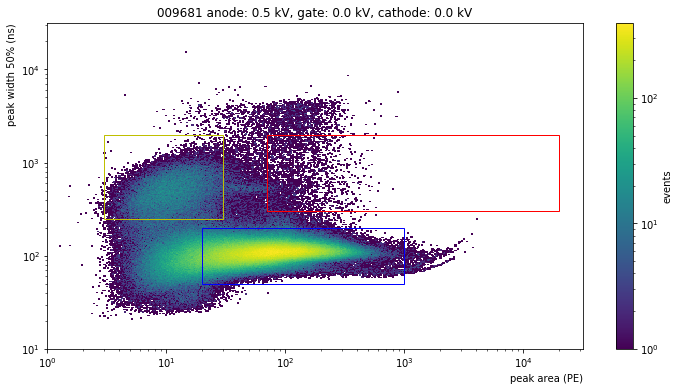

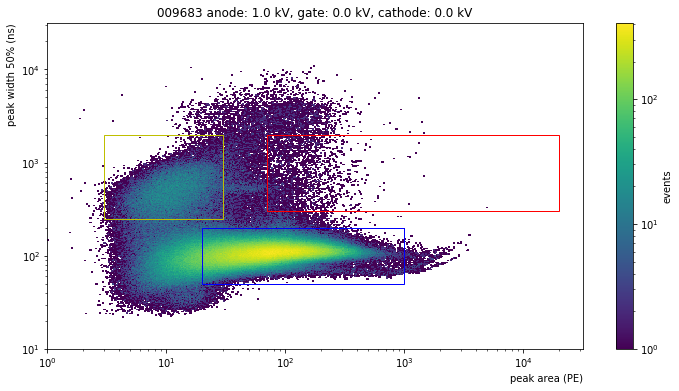

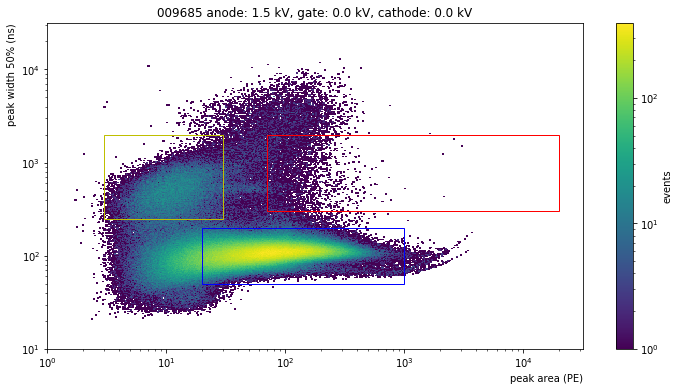

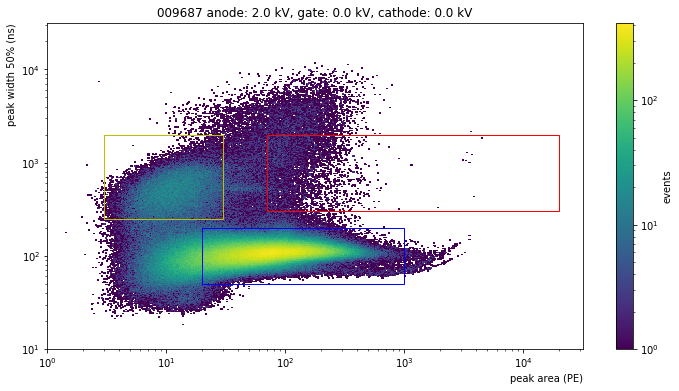

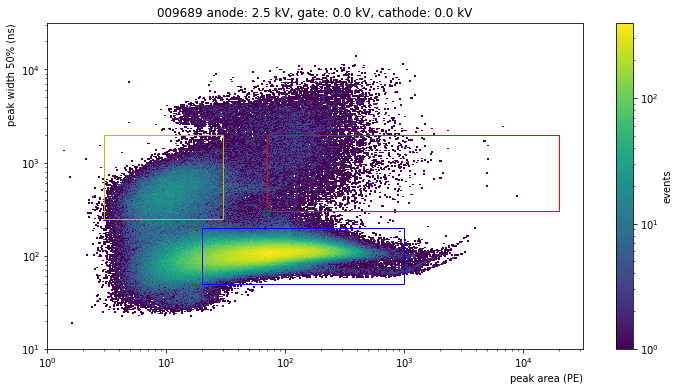

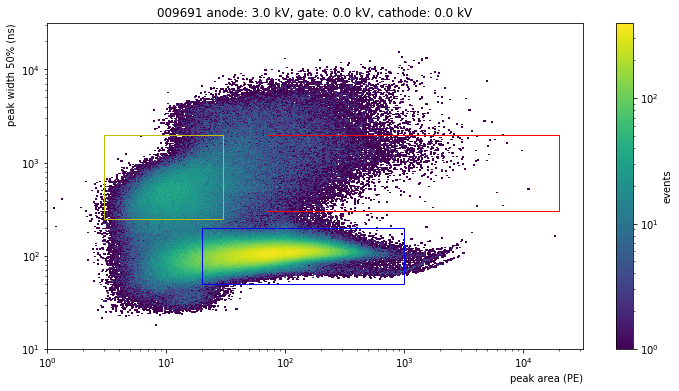

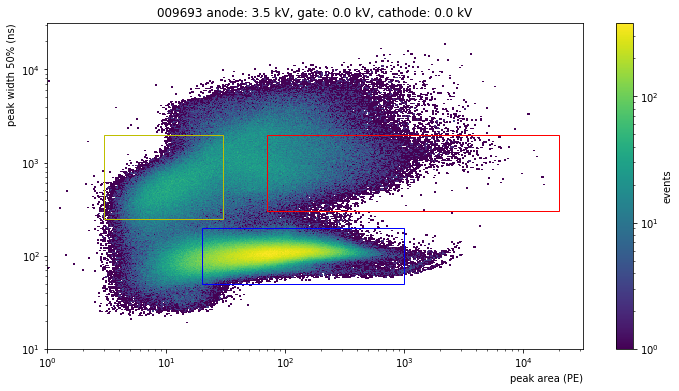

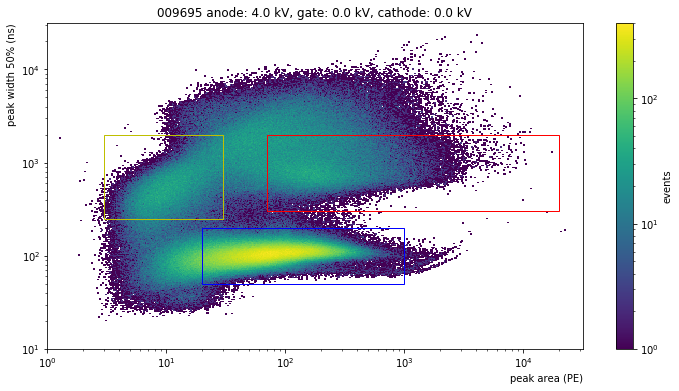

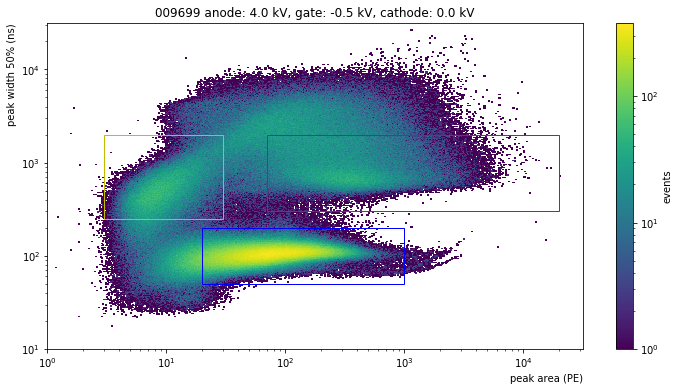

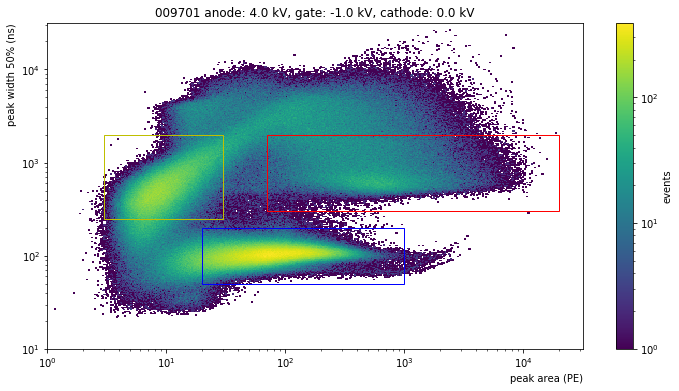

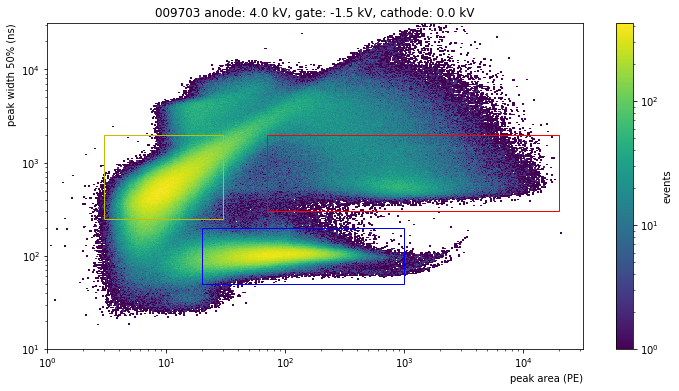

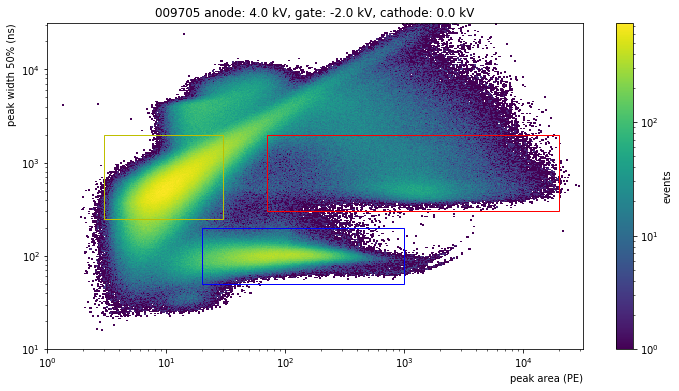

In [11]:
plot_area_vs_width(runs,anode,gate,cathode)

<Figure size 864x432 with 0 Axes>

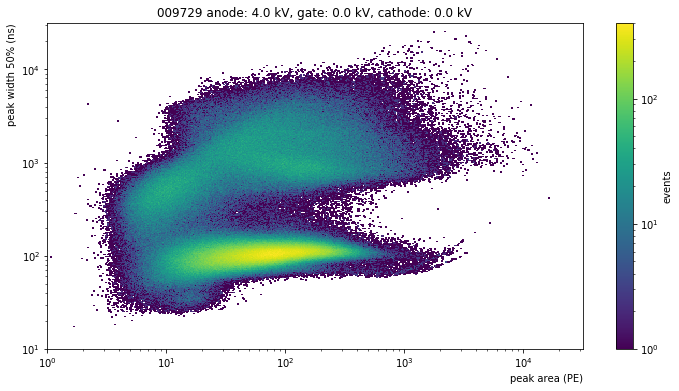

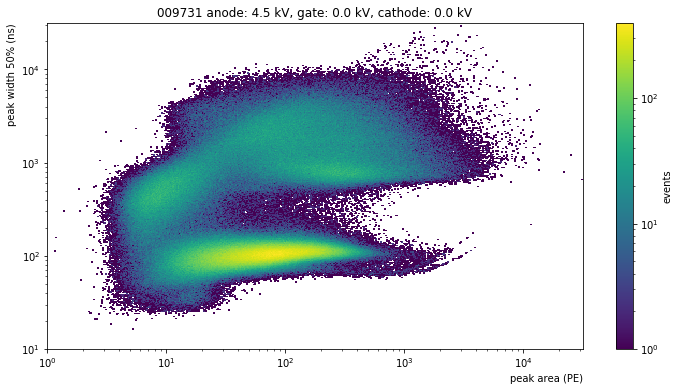

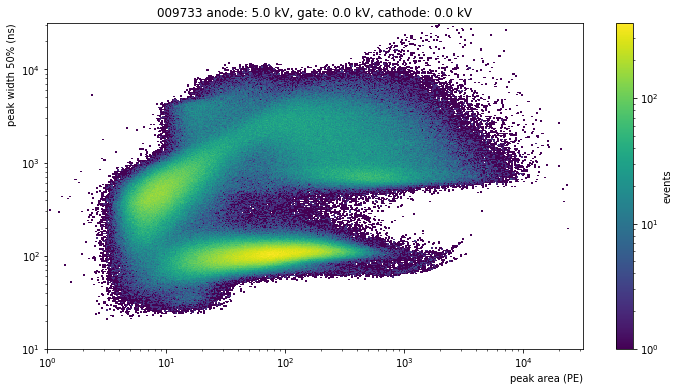

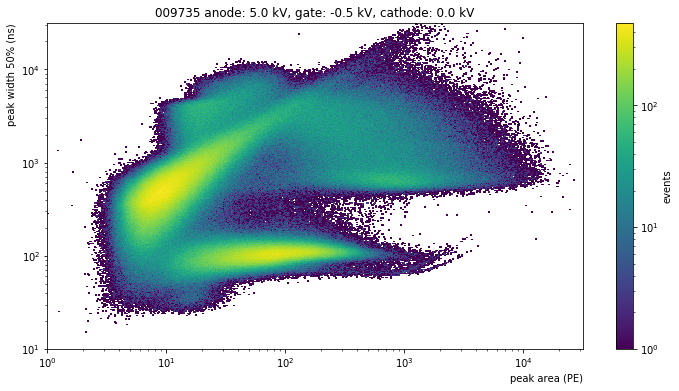

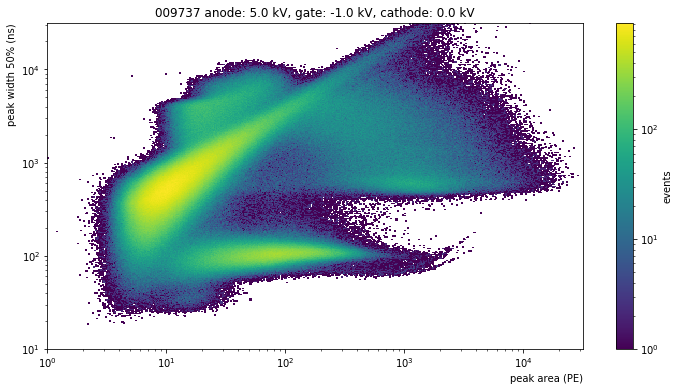

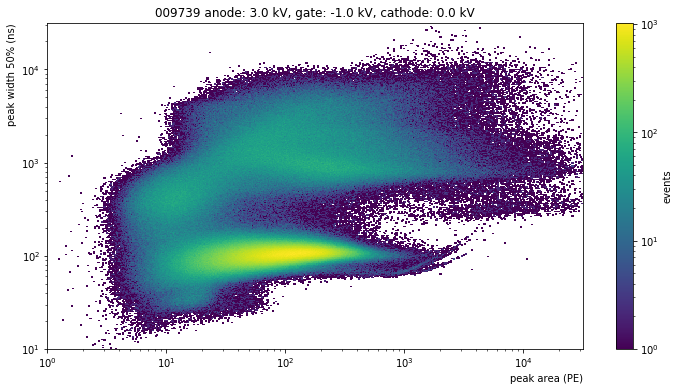

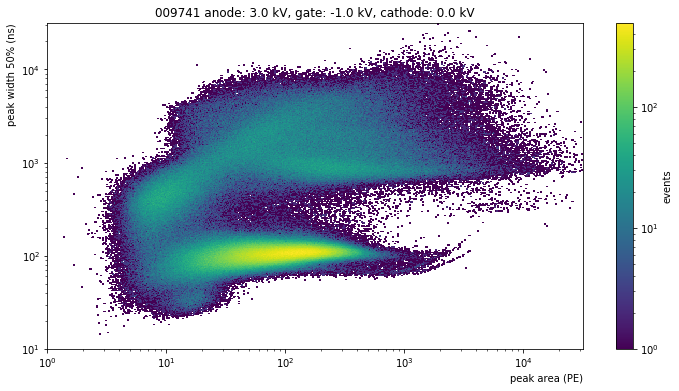

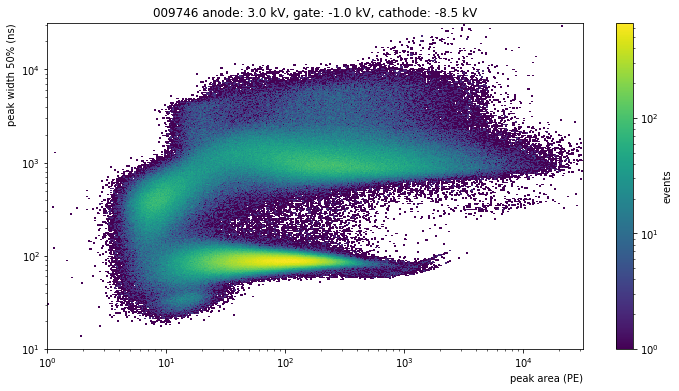

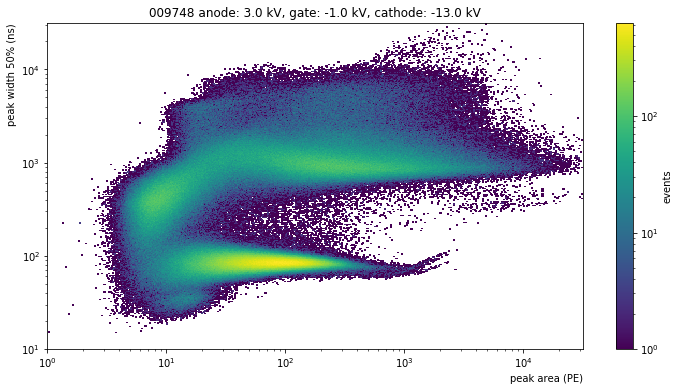

In [13]:
plot_area_vs_width(runs2,anode2,gate2,cathode2)

In [13]:
def calculate_events(data,area_cut,width_cut,ndiv=1):
    livetime = (data['time'][len(data)-1]-data['time'][0])#/1e9
    for i in range(ndiv):
        events = len(data[(data['area']<area_cut[1]) & (data['area']>area_cut[0]) &
                          (data['range_50p_area']<width_cut[1]) &
                          (data['range_50p_area']>width_cut[0]) &
                          (data['time']>(data['time'][0]+i*livetime/ndiv)) &
                          (data['time']<(data['time'][0]+(i+1)*livetime/ndiv))])
        rate = events/(livetime/1e9/ndiv)/np.max(data['n_channels'])
        rate_err = rate**0.5
        #print('interval',i,'rate',rate,'+/-',rate_err)
    return rate, rate_err

In [14]:
def plot_rate(runs,anode,gate,cathode):
    rate1, rate1e = np.zeros(len(runs)), np.zeros(len(runs))
    rate2, rate2e = np.zeros(len(runs)), np.zeros(len(runs))
    rate3, rate3e = np.zeros(len(runs)), np.zeros(len(runs))
    for i, run in enumerate(runs):
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        rate1[i],rate1e[i] = calculate_events(peaks,area_cut1,width_cut1)
        rate2[i],rate2e[i] = calculate_events(peaks,area_cut2,width_cut2)
        rate3[i],rate3e[i] = calculate_events(peaks,area_cut3,width_cut3)
    fig, axs = plt.subplots(4,figsize=(12,8), gridspec_kw={'height_ratios': [2,3,3,3]})
    axs[0].set_ylabel('voltage (kV)', ha='right', y=1,fontsize='12')
    axs[0].plot(runs, anode, 'g--',label='anode')
    axs[0].plot(runs, gate, 'm:',label='gate')
    axs[0].plot(runs, cathode, 'k-.',label='cathode')
    axs[0].legend()
    axs[1].plot(runs,rate1,marker='o',color='b',label='S1 region')
    axs[2].plot(runs,rate2,marker='o',color='r',label='S2 region')
    axs[3].plot(runs,rate3,marker='o',color='y',label='SPE region')
    axs[3].set_xlabel('run', ha='right', x=1)
    plt.subplots_adjust(wspace=0, hspace=0)
    for i in range(0,3):
        axs[i].set_ylabel('events/s/PMT', ha='right', y=1)
        axs[i].legend()

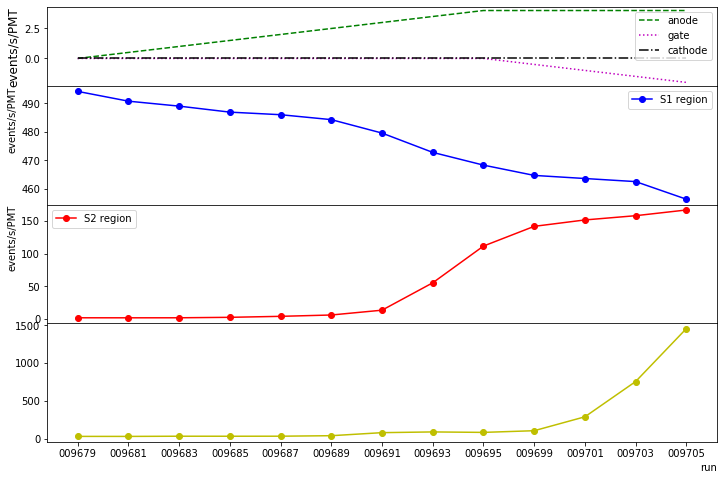

In [15]:
plot_rate(runs,anode,gate,cathode)

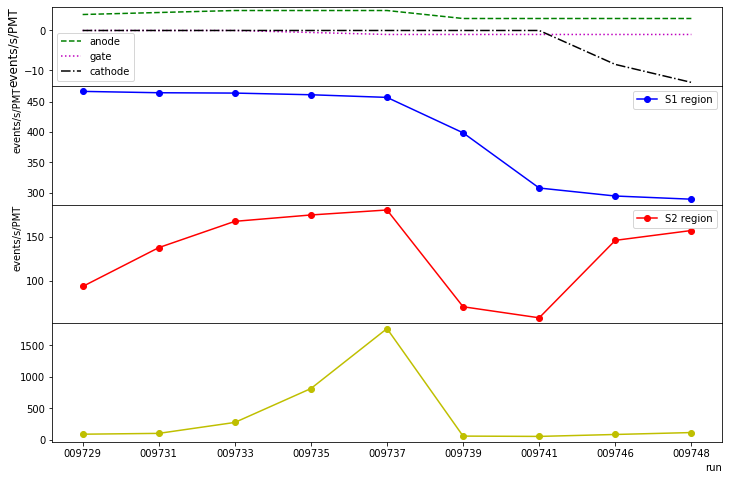

In [16]:
plot_rate(runs2,anode2,gate2,cathode2)

In [17]:
peaks0 = st.get_array(runs[0],['peaks','peak_basics'],seconds_range=(0,5),progress_bar=False)
peaks3 = st.get_array(runs[8],['peaks','peak_basics'],seconds_range=(0,5),progress_bar=False)
peaks_s2 = st.get_array(runs2[-1],['peaks','peak_basics'],seconds_range=(0,5),progress_bar=False)

total number of records 11479
total number of records 6054
total number of records 4400


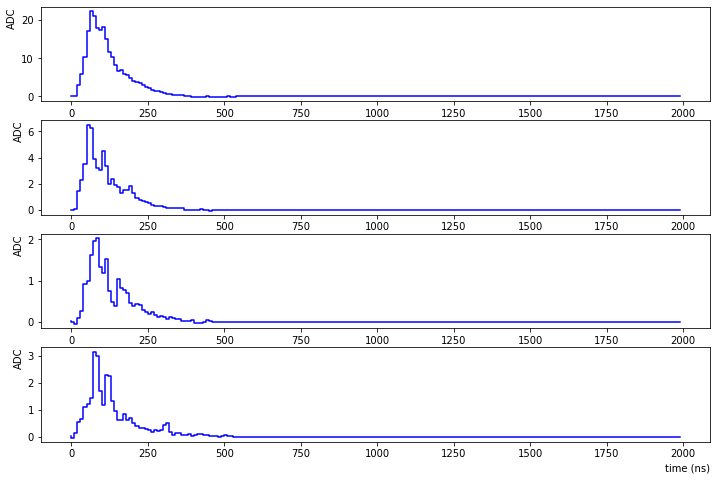

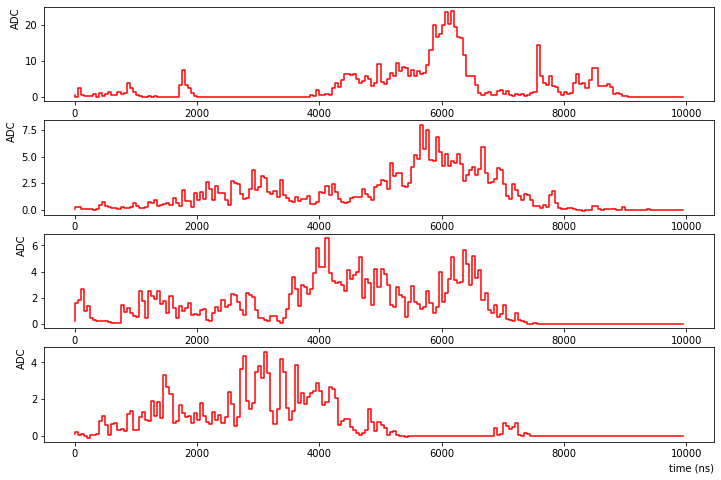

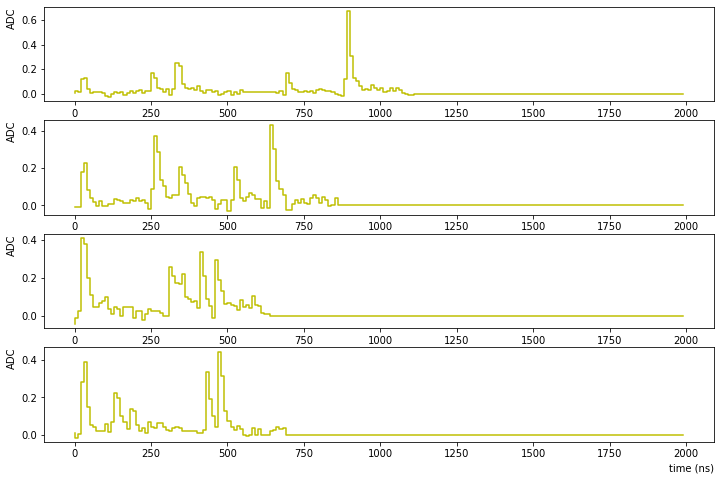

In [18]:
psu.plotwf(peaks_s2,4,area_cut1,width_cut1,'b')
psu.plotwf(peaks_s2,4,area_cut2,width_cut2,'r')
psu.plotwf(peaks_s2,4,area_cut3,width_cut3,'y')

In [4]:
events = st.get_array('009746','event_basics')
events2 = st.get_array('009748','event_basics')

In [8]:
def plot_area_width(events, run_id, low = 0, high = 4.5, low2 = 1, high2 = 4.5, binning = 500):
    ph_s1 = Histdd(events['s1_area'], events['s1_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    ph_s2 = Histdd(events['s2_area'], events['s2_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    plt.figure(figsize=(12,6))
    ph_s1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
    ph_s2.plot(log_scale=True, cblabel='S2 events')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("peak width 50% (ns)", ha='right', y=1)
    plt.title(f'run {run_id}')
    plt.xscale('log')
    plt.yscale('log')

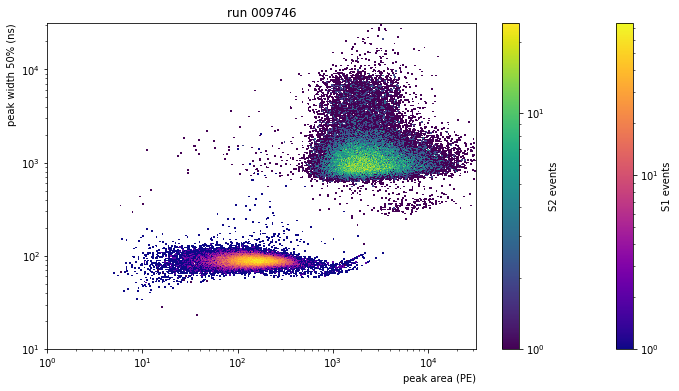

In [9]:
plot_area_width(events,'009746')

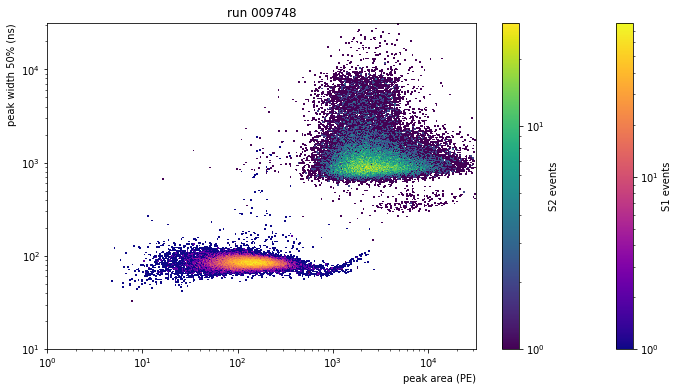

In [10]:
plot_area_width(events2,'009748')

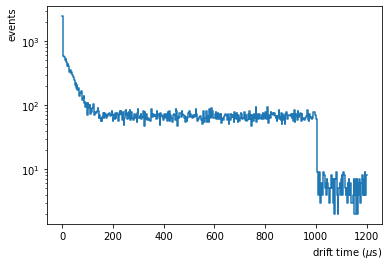

In [21]:
hdtime = Hist1d(events['drift_time']/1000, bins=(np.linspace(0, 1200, 500)))
hdtime.plot()
plt.ylabel("events", ha='right', y=1)
plt.xlabel("drift time ($\mu$s)", ha='right', x=1)
plt.yscale('log')

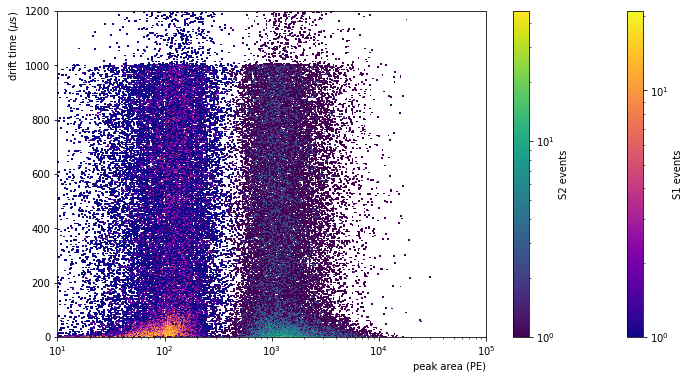

In [22]:
low, high, low2, high2, binning = 0, 5, 1, 5, 500
ph_dt1 = Histdd(events['s1_area'], events['drift_time']/1000,
                bins=(np.logspace(low, high, binning), np.linspace(0, 1200, 500)))
ph_dt2 = Histdd(events['s2_area'], events['drift_time']/1000,
                bins=(np.logspace(low2, high2, binning), np.linspace(0, 1200, 500)))
plt.figure(figsize=(12,6))
ph_dt1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
ph_dt2.plot(log_scale=True, cblabel='S2 events')
plt.xlabel("peak area (PE)", ha='right', x=1)
plt.ylabel("drift time ($\mu$s)", ha='right', y=1)
plt.xscale('log')
#plt.yscale('log')

Totale number of events 41921


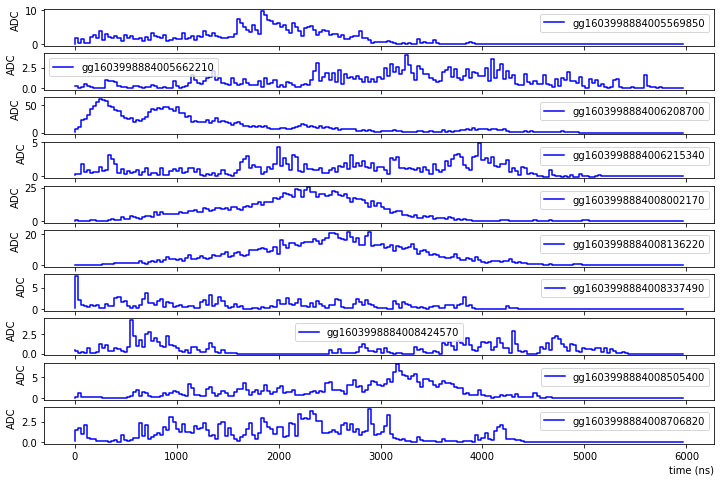

In [23]:
import time
res = []
area = []
width = []
print('Totale number of events',len(events))
t_start = time.time()
for i,e in enumerate(events):
    if (i>0): break
    #    res.append(st.get_array('009746',['peaks','peak_basics'], time_within=e,
    #                            selection_str=('area>100','range_50p_area>500'),
    #                            progress_bar=False))
    #try:
    peaks = st.get_array('009746',['peaks','peak_basics'], time_within=e, 
                             selection_str=('area>100','range_50p_area>500'),
                             progress_bar=False)
    nn = len(peaks['data'])
    dt = peaks['dt'][0]
    dts = np.arange(0,peaks['data'].shape[1]*dt,dt)
    fig, axs = plt.subplots(nn,figsize=(12,8))
    for i in range(nn):
        t = peaks['time'][i]
        axs[i].plot(dts,peaks['data'][i],drawstyle='steps',color='b',
                    label=f'gg{t}')
        axs[i].set_xlabel("time (ns)", ha='right', x=1)
        axs[i].set_ylabel(f"ADC", ha='right', y=1)
        axs[i].legend()
    #except: print('event',i,e['time'])
    area.append(peaks['area'])
    width.append(peaks['range_50p_area'])
    diff = time.time() - t_start
    if ((i%10)==0): print(f'event n. {i}, selected events: {len(area)}, time to process: {diff:.2f} s')
area = np.concatenate(area)
width = np.concatenate(width)

In [24]:
data_s2 = data[(data['area']>30) & (data['range_50p_area']>500)]

NameError: name 'data' is not defined

In [25]:
ph_res = Histdd(data_s2['area'], data_s2['range_50p_area'],
                bins=(np.logspace(0, 5, 500),np.logspace(1, 5, 500)))
plt.figure(figsize=(12,6))
ph_res.plot(log_scale=True, cblabel='events')
plt.xlabel("peak area (PE)", ha='right', x=1)
plt.ylabel("peak width 50% (ns)", ha='right', y=1)
plt.xscale('log')
plt.yscale('log')

NameError: name 'data_s2' is not defined

In [26]:
psu.plotwf(res,5,(0,1e5),(0,1e5),'b')

TypeError: list indices must be integers or slices, not str

In [27]:
def select_previous_event(run, max_diff=2000, area_cut=30, width_cut=500):
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
    selection = (peaks['area']>area_cut)&(peaks['range_50p_area']>width_cut)
    nev_tot = len(peaks)
    nev = len(peaks[selection])
    diff,times = np.zeros(nev),np.zeros(nev)
    sel2, difft = np.zeros(len(selection)),np.zeros(len(selection))
    j = 0
    for i, time in enumerate(peaks['time']):
        if i < (nev_tot-1):
            sel2[i]=selection[i+1]
            difft[i] = (peaks['time'][i+1]-peaks['time'][i])
        if selection[i]:
            diff[j]= (peaks['time'][i]-peaks['time'][i-1])
            times[j] = (peaks['time'][i]-peaks['time'][0])
            j += 1
    peaks_1 = peaks[selection]
    peaks_2 = peaks[ (sel2==1) & (difft<max_diff) ]
    print('Total events',nev_tot,'selected',len(peaks_2))
    return difft, peaks_1, peaks_2

Total events 1946366 selected 10458


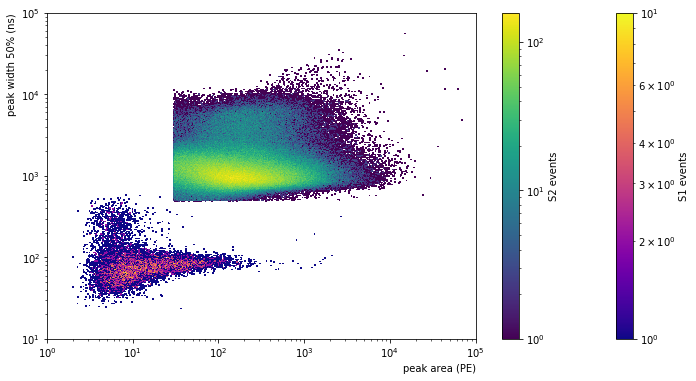

In [28]:
diff, peaks_1, peaks_2 = select_previous_event('009746',1000)
low, high, low2, high2, binning = 0, 5, 1, 5, 500
ph_s2 = Histdd(peaks_1['area'], peaks_1['range_50p_area'],
                bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
ph_s1 = Histdd(peaks_2['area'], peaks_2['range_50p_area'],
                bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
plt.figure(figsize=(12,6))
ph_s1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
ph_s2.plot(log_scale=True, cblabel='S2 events')
plt.xlabel("peak area (PE)", ha='right', x=1)
plt.ylabel("peak width 50% (ns)", ha='right', y=1)
plt.xscale('log')
plt.yscale('log')

Text(0.5, 1, 'time difference (ns)')

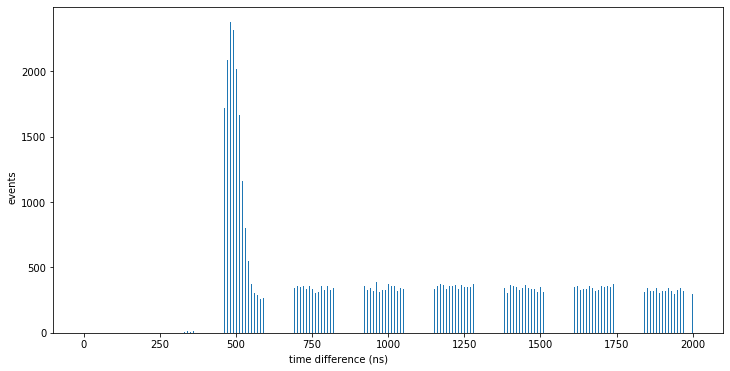

In [29]:
plt.figure(3,figsize=(12,6))
plt.hist(diff,bins=1000,range=(0,2000))
plt.ylabel("events", ha='right', x=1)
plt.xlabel("time difference (ns)", ha='right', y=1)